In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the number of columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and rows that are null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points in each type
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
sum(city_data_df["type"]=="Rural")

18

## Inspecting Ride data

In [12]:
# get the columns and rows that are not null for ride_data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the number of columns and rows that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge data sets

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Create Dataframes for each type of city (Module 5.3.1)

In [16]:
# Create the Urban City Dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the SubUrban and Rural city dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

## Get the number of rides for each city type (5.3.2)

In [18]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

## Get the Avg fare for each city (5.3.3)

In [19]:
# Get the average far for each city in urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

## Get the number of drivers per city (5.3.4)

In [20]:
# Get the average number of drivers per city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

## Create Bubble Charts (5.3.5)

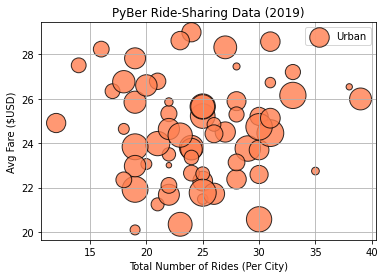

In [21]:
# Build scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8,
            label="Urban",
            s=urban_driver_count *10)

# Formatting
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg Fare ($USD)")

plt.grid()
plt.legend()

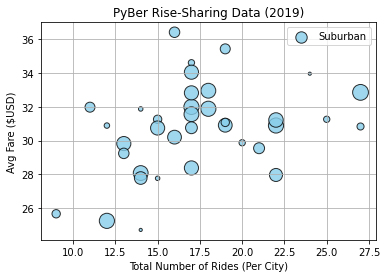

In [22]:
# Build scatter plot for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           c="skyblue", 
           edgecolors= "black", linewidths=1,
           alpha=0.8,
           label="Suburban",
           s=suburban_driver_count*10)

# Formatting
plt.title("PyBer Rise-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg Fare ($USD)")

plt.grid()
plt.legend()

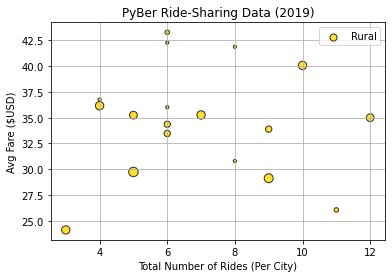

In [23]:
# Create scatter plot for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
           c="gold",
           edgecolors="black", linewidths=1,
           alpha=0.8,
           label="Rural",
           s=rural_driver_count*10)

# Formatting
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg Fare ($USD)")

plt.grid()
plt.legend()

## Create the Combined Bubble Chart for all cities

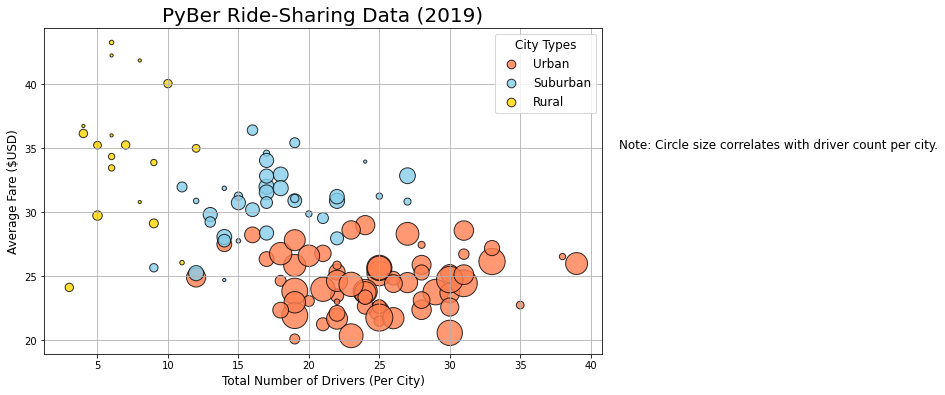

In [24]:
# Combine all 3 charts
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8,
            label="Urban",
            s=urban_driver_count *10)

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           c="skyblue", 
           edgecolors= "black", linewidths=1,
           alpha=0.8,
           label="Suburban",
           s=suburban_driver_count*10)

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
           c="gold",
           edgecolors="black", linewidths=1,
           alpha=0.8,
           label="Rural",
           s=rural_driver_count*10)

# Formatting
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Drivers (Per City)", fontsize=12)
plt.ylabel("Average Fare ($USD)", fontsize=12)
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add a text label about circle size                                            LIKELY WONT SAVE SIDE NOTE
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("Analysis/Fig1.png")
plt.show()


## Summary Statistics for number of rides by city type (Module 5.4.1)

In [25]:
# Get the summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
# Summary stats on suburban RIDE COUNT
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
# Summary stats on rural RIDE COUNT
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Pandas central tendency methods (5.4.1)

In [28]:
# Calculate the mean ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [29]:
# Median number of rides in urban cities
round(urban_ride_count.median(),2)

24.0

In [30]:
# Mode for the number of rides in suburban cities
suburban_ride_count.mode()

0    17
dtype: int64

## NumPy central tendencies

In [31]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [32]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


## Summary statistics for Fare by city type (5.4.2)

In [33]:
# Get the fares for urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [34]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for the urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for the urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


## Summary statistics for the number of drivers by city type (5.4.3)

In [35]:
# Get the drive count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [36]:
# Calculate the measures of central tendencies for the average driver count in urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of urban drivers is {mean_urban_drivers}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of urban drivers is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of urban drivers is {mode_urban_drivers}.")

The mean number of urban drivers is 36.67815384615385.
The median number of urban drivers is 37.0.
The mode number of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


## Create Box and Whisker Plot (5.4.4)

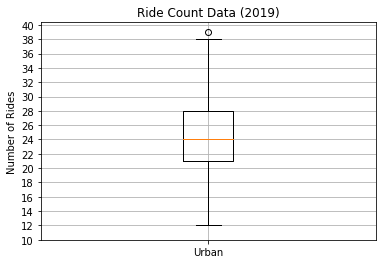

In [37]:
# Create a box and whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Format
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

plt.show()

## Combining all three box and whisker plots

<function matplotlib.pyplot.show(close=None, block=None)>

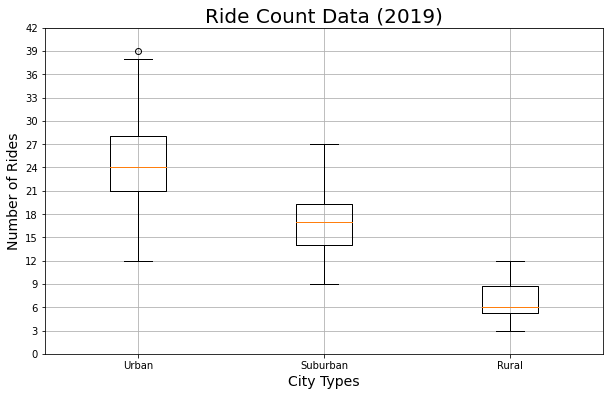

In [38]:
# Add all ride count box-and-whsiker plots to the same chart
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the Figure
plt.savefig("Analysis/Fig2.png")

plt.show

In [39]:
# Get the city that matches 39 (outlier found in urban cities data)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box and Whisker Plots for Ride Fare Data

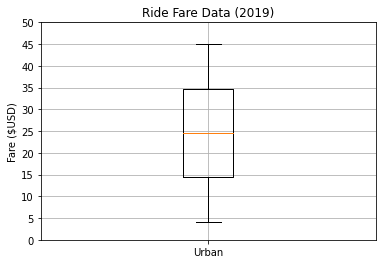

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [40]:
# Create a box and whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.show()

# Create summary statistics data below chart
print("Summary Statistics")
urban_fares.describe()

## Box and Whisker Plots for Driver Count Data

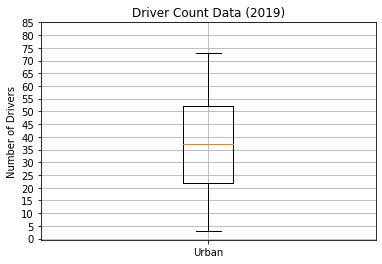

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [41]:
# Create a box and whisker plot for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.show()

# Create summary statistics below chart
print("Summary Statistics")
urban_drivers.describe()

## Get the Percent of Fares for Each City Type (Module 5.5.1)

In [42]:
# Get the total fares per city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [43]:
# NOT NEEDED IF YOU PERFORM NEXT CELL FUNCTION
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [44]:
# Calculate the percentage of fare for each city type
type_percents = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum() * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

## Pie Chart for the percentage of fares by city type (5.5.2)

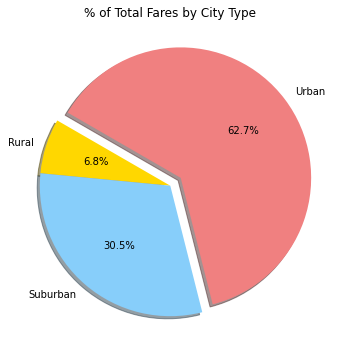

In [45]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl

# Build the percentage of fares by city pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14
plt.show()

## Calculate Ride Percentages (5.6.1)

In [46]:
# Get ride count per city type
pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [47]:
# Get total ride count
pyber_data_df["ride_id"].count()

2375

In [48]:
# Calculate the percentage of rides for each city type
ride_percents = pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count() * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

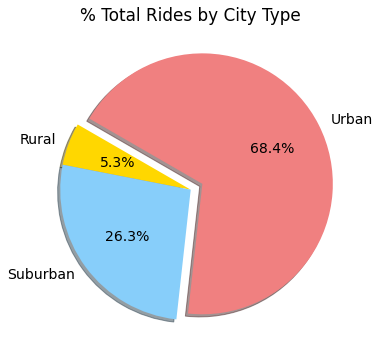

In [49]:
# Import mpl to change the plot config
import matplotlib as mpl

# Build the percentage of rides by city type
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
       labels= ["Rural", "Suburban", "Urban"],
        colors= ["gold", "lightskyblue", "lightcoral"],
        explode= [0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% Total Rides by City Type")

# Change default font size from 10 to 14
mpl.rcParams['font.size'] = 14

plt.show()

## Calculate Driver Percentages (5.7.1)

In [50]:
# Calculate the driver percents by city type
driver_percents = city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum() * 100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

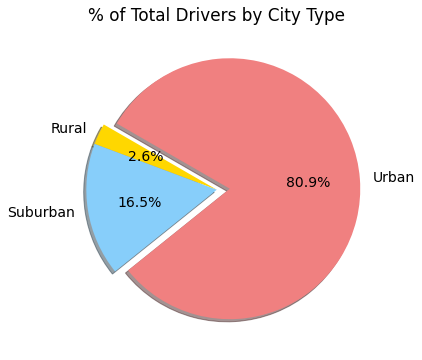

In [51]:
# Create pie chart for driver percentages for city type
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
       labels= ["Rural", "Suburban", "Urban"],
        colors= ["gold", "lightskyblue", "lightcoral"],
        explode= [0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

mpl.rcParams['font.size'] = 14

plt.show()